## **Kaggle Challenge: Diamond Prices Prediction**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv.zip to diamonds.csv.zip


In [2]:
!unzip diamonds.csv.zip -d /content/data/

Archive:  diamonds.csv.zip
  inflating: /content/data/diamonds.csv  


In [3]:
!ls /content/data/

diamonds.csv


### **1. Data Understanding and Visualization**

In [4]:
# Read the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/data/diamonds.csv')

print(df.head(10))

   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


In [5]:
# Data Shape
print(df.shape)

(53940, 10)


In [6]:
# Data Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


In [7]:
print(df.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [8]:
# Features Summary

features_summary = []

for column in df.columns:
  if df[column].dtype == 'object':
    feature_type = 'Categorical'
    values = df[column].unique()

  else:
    feature_type = 'Numerical'
    values = f"{df[column].min()} to {df[column].max()}"

  missing_values = df[column].isnull().sum()
  duplicated_values = df.duplicated().sum()
  features_summary.append([column, feature_type, values, missing_values])

features_table = pd.DataFrame(features_summary, columns=['Feature', 'Type', 'Values', 'Missing Values'])

print(features_table)
print("Duplicated Values:", duplicated_values)

   Feature         Type                                    Values  \
0    carat    Numerical                               0.2 to 5.01   
1      cut  Categorical   [Ideal, Premium, Good, Very Good, Fair]   
2    color  Categorical                     [E, I, J, H, F, G, D]   
3  clarity  Categorical  [SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF]   
4    depth    Numerical                              43.0 to 79.0   
5    table    Numerical                              43.0 to 95.0   
6    price    Numerical                              326 to 18823   
7        x    Numerical                              0.0 to 10.74   
8        y    Numerical                               0.0 to 58.9   
9        z    Numerical                               0.0 to 31.8   

   Missing Values  
0               0  
1               0  
2               0  
3               0  
4               0  
5               0  
6               0  
7               0  
8               0  
9               0  
Duplicated Values: 1

In [9]:
# Detecting Outliers

outliers_summary = []
for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    outliers_summary.append([column, outliers])

outliers_table = pd.DataFrame(outliers_summary, columns=['Feature', 'Outliers Count'])
print(outliers_table)

  Feature  Outliers Count
0   carat            1889
1   depth            2545
2   table             605
3   price            3540
4       x              32
5       y              29
6       z              49


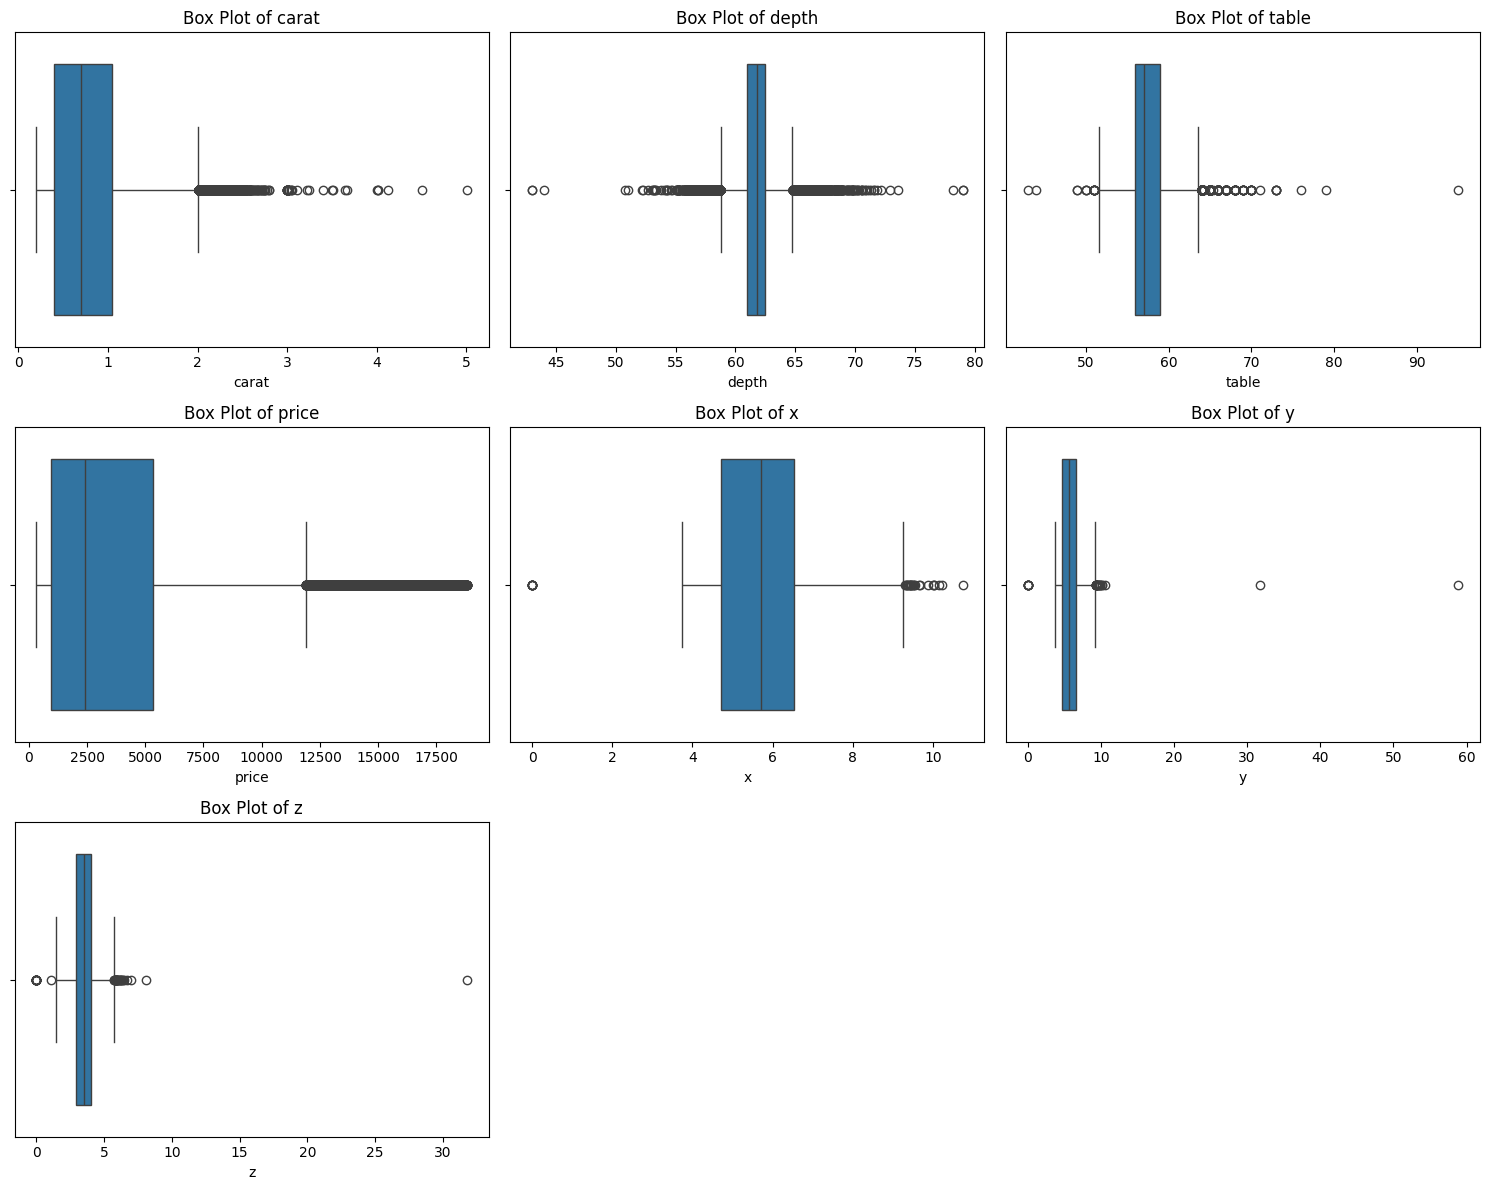

In [10]:
# Create a Box-Plot Diagram to visualize the outliers

# Select all numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Calculate rows and columns for subplots
num_vars = len(numeric_columns)
cols = 3  # number of boxplots per row
rows = int(np.ceil(num_vars / cols))

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
# Create histogram distribution

# Function to compare distributions
def compare_distributions(df, column_name, selections, **kwargs):
    for label, selection in selections.items():
        plt.hist(df[selection][column_name], label=label, **kwargs)
    plt.legend()

# Function to plot distributions by any categorical feature
def plot_overlap_distributions(df, category_feature, numeric_features, bins=30):
    selection_dict = {category: df[category_feature] == category for category in df[category_feature].unique()}

    plt.figure(figsize=(20, 20))
    for i, column_name in enumerate(numeric_features):
        plt.subplot(3, 3, i + 1)
        compare_distributions(df, column_name, selection_dict, alpha=0.5, density=True, bins=bins, stacked=False)
        plt.xlabel(column_name)
        plt.title(f'Distribution by {category_feature.capitalize()}: {column_name}')

    plt.tight_layout()
    plt.show()

# Numeric features to plot
numeric_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']

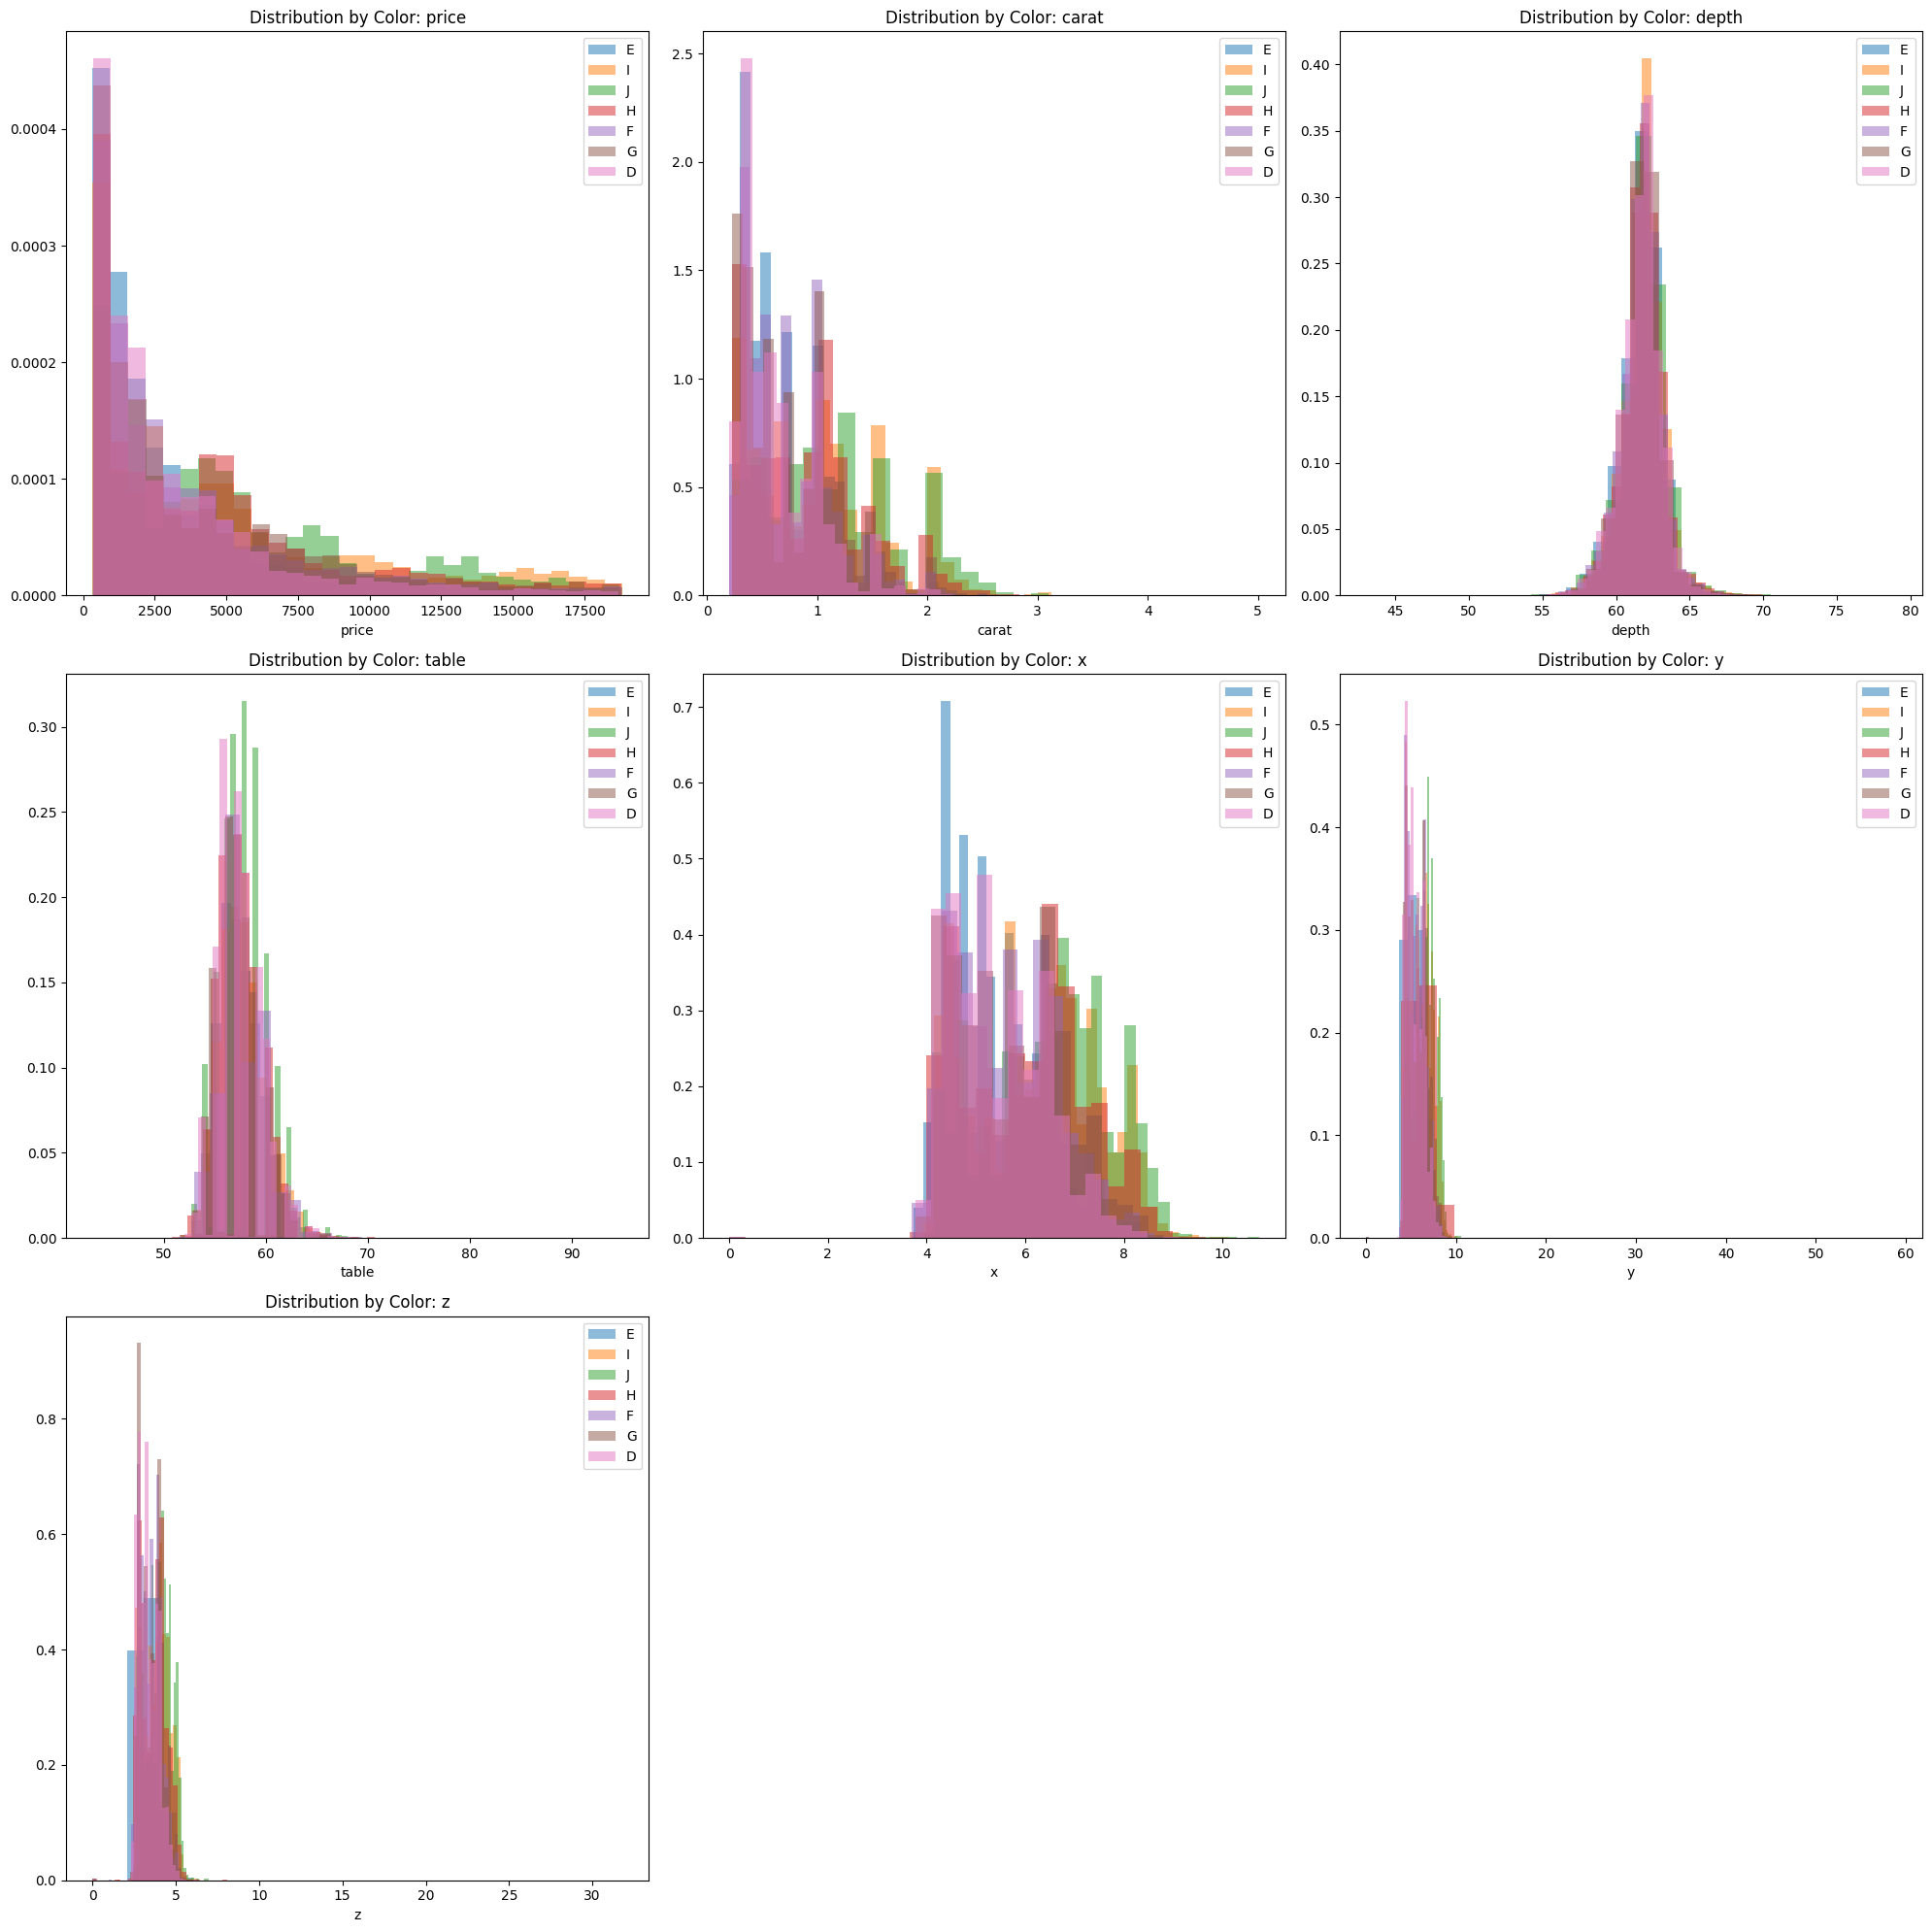

In [12]:
# Compare the categorical feature 'Color' with other numerical features
plot_overlap_distributions(df, 'color', numeric_features)

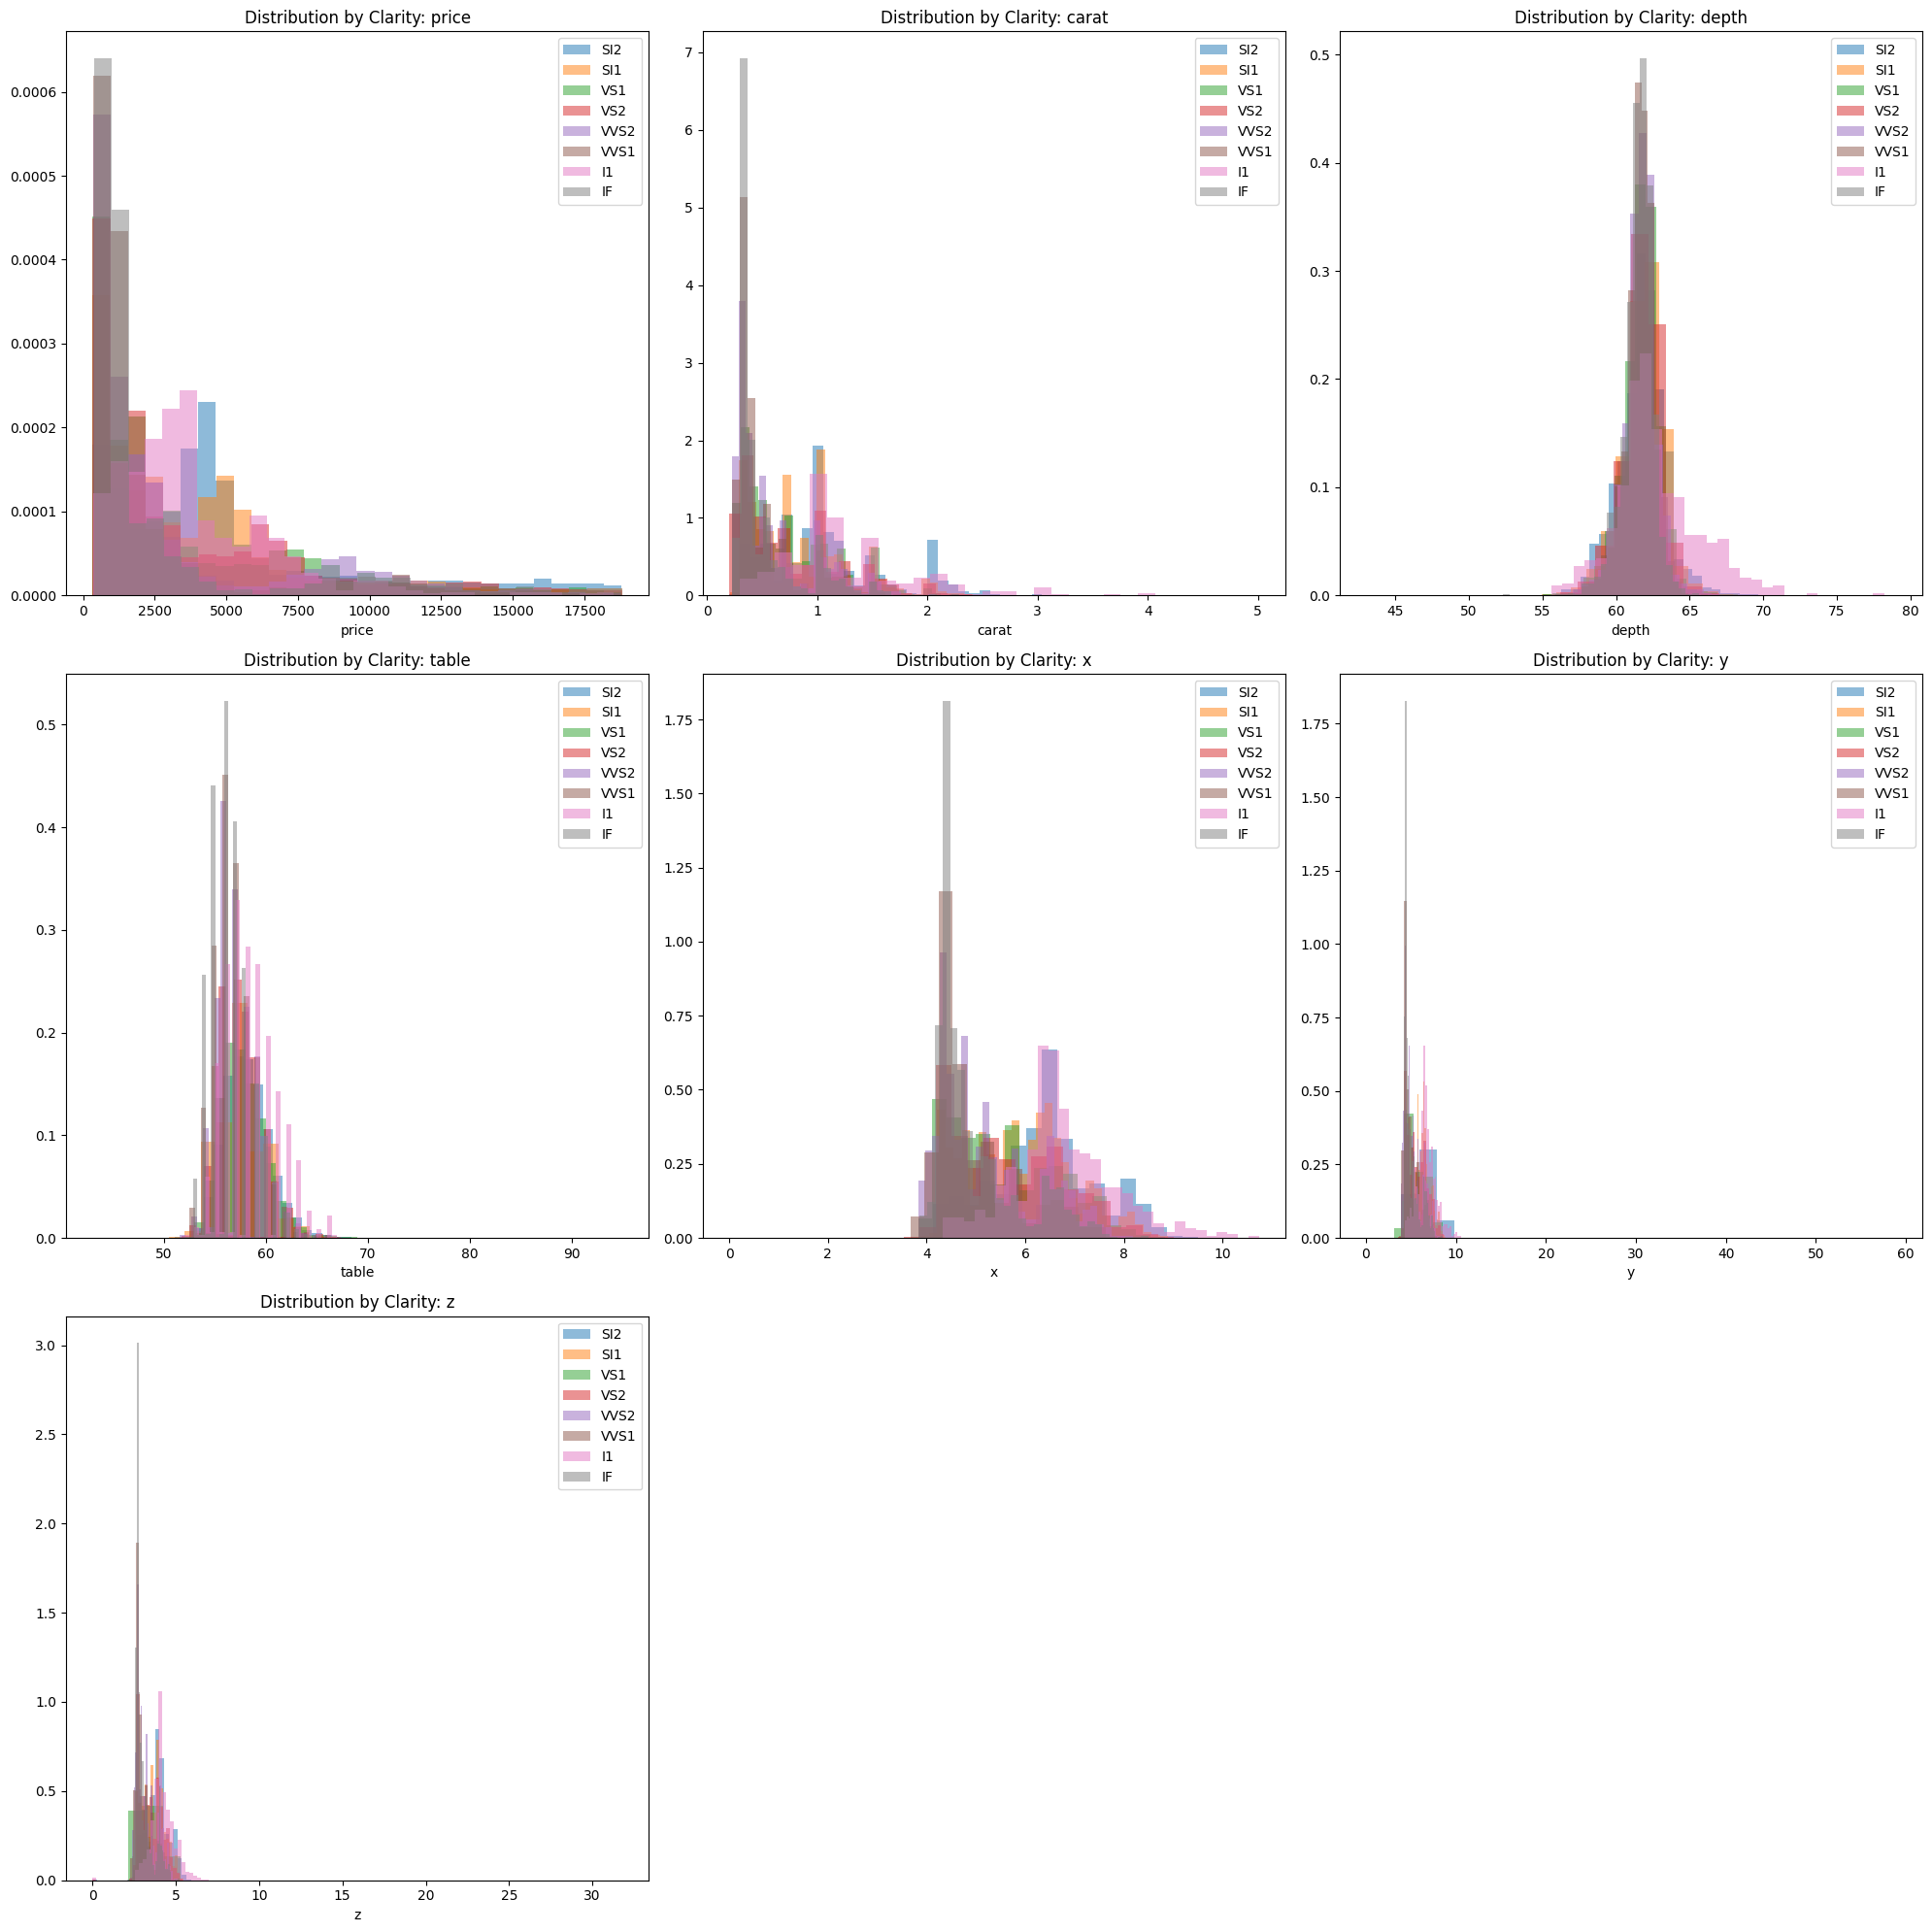

In [14]:
# Compare the categorical feature 'Clarity' with other numerical features
plot_overlap_distributions(df, 'clarity', numeric_features)

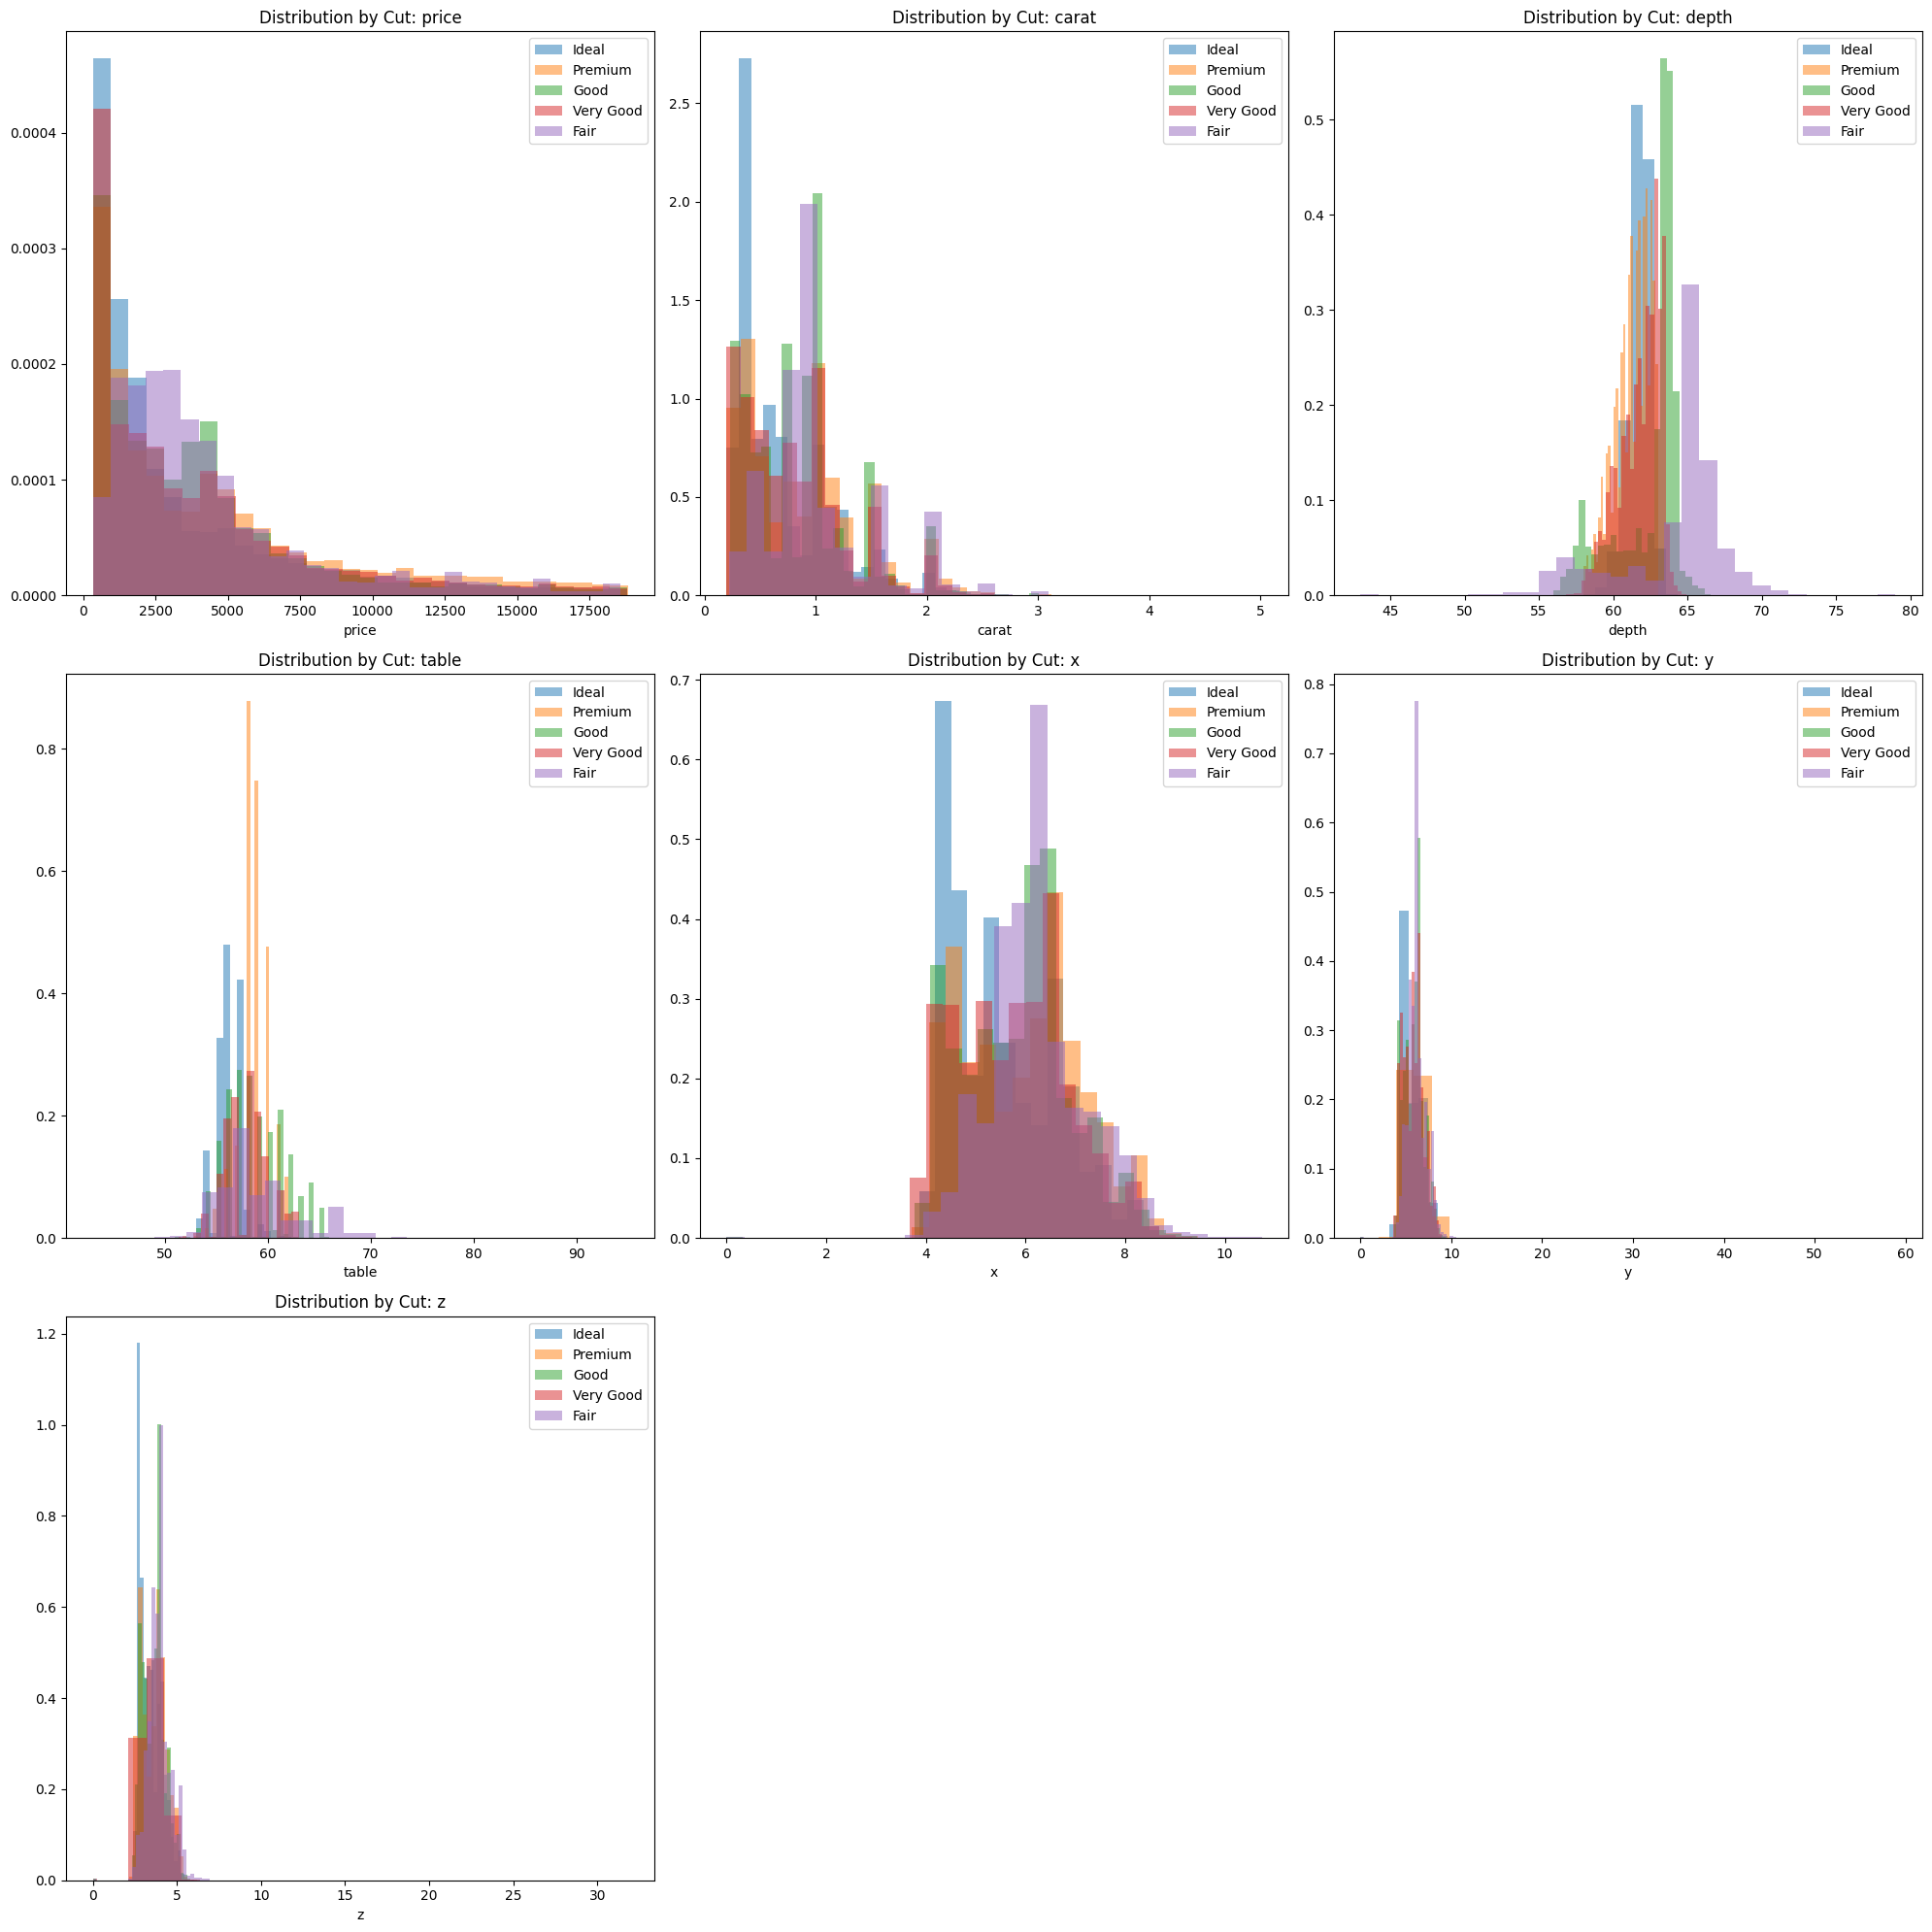

In [13]:
# Compare the categorical feature 'Cut' with other numerical features
plot_overlap_distributions(df, 'cut', numeric_features)

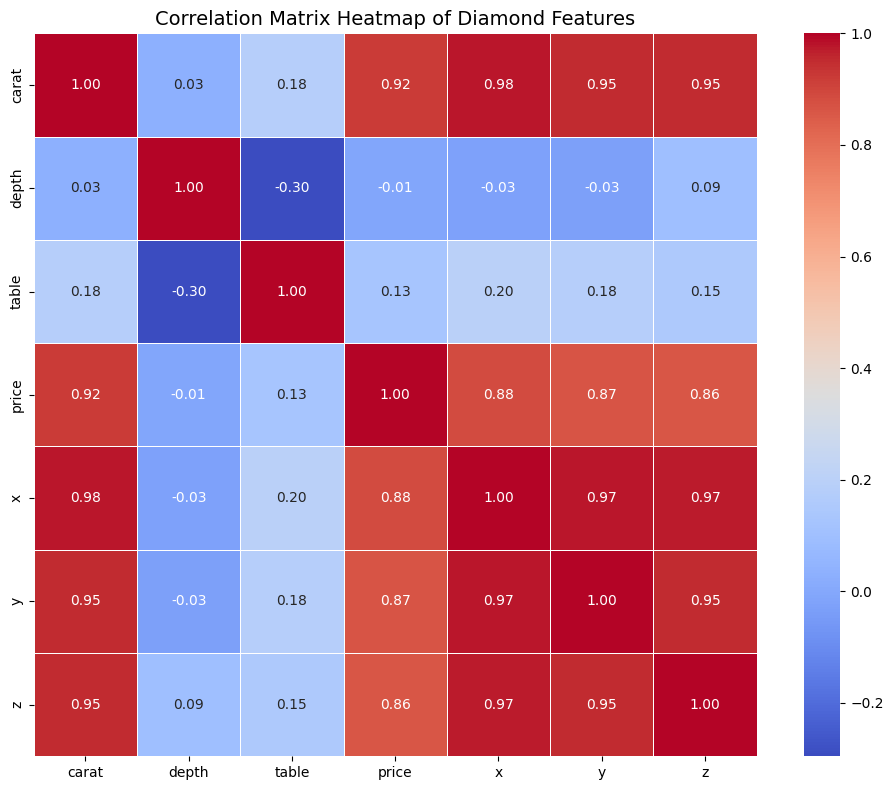

In [15]:
# Correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap of Diamond Features', fontsize=14)

plt.tight_layout()
plt.show()

### **2. Baseline Model**

In [16]:
# Create a Baseline Model for Linear Regression, Decision Tree, and KNN
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['carat', 'depth', 'table', 'x', 'y','z']]
y = df['price']

# Splitting data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
KNN_reg = KNeighborsRegressor()

# Train the models
lin_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
KNN_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)
y_pred_KNN = KNN_reg.predict(X_test)

# Set up for R^2 Adjusted
n = X_test.shape[0]
p = X_test.shape[1]

metrics = {
    "Model": ["Linear Regression", "Decision Tree", "KNeighbors"],

    "RMSE": [
        np.sqrt(mean_squared_error(y_test,y_pred_lin)),
        np.sqrt(mean_squared_error(y_test,y_pred_tree)),
        np.sqrt(mean_squared_error(y_test,y_pred_KNN))
        ],

    "R2 Score": [
        r2_score(y_test,y_pred_lin),
        r2_score(y_test,y_pred_tree),
        r2_score(y_test,y_pred_KNN)
        ],

    "Adjusted R2": [
        1 - (1-r2_score(y_test, y_pred_lin))*(n-1)/(n-p-1),
        1- (1-r2_score(y_test, y_pred_tree))*(n-1)/(n-p-1),
        1- (1-r2_score(y_test, y_pred_KNN))*(n-1)/(n-p-1)
        ],
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

               Model         RMSE  R2 Score  Adjusted R2
0  Linear Regression  1497.390699  0.858954     0.858876
1      Decision Tree  1869.119960  0.780232     0.780110
2         KNeighbors  1447.543682  0.868189     0.868115


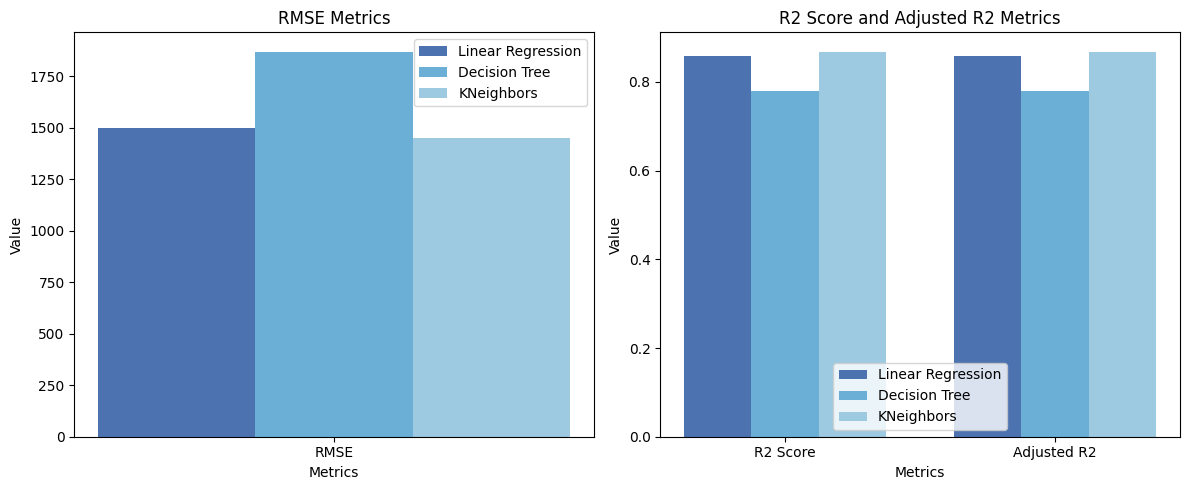

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define metric categories
metrics_rmse = ['RMSE']
metrics_r2 = ['R2 Score', 'Adjusted R2']

x_rmse = np.arange(len(metrics_rmse))
x_r2 = np.arange(len(metrics_r2))

# Width of the bars
bar_width = 0.25

colors = ['#4C72B0', '#6BAED6', '#9ECAE1']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# RMSE bar chart
ax[0].bar(x_rmse - bar_width, [metrics_df.iloc[0, 1]], bar_width, label='Linear Regression', color=colors[0])
ax[0].bar(x_rmse, [metrics_df.iloc[1, 1]], bar_width, label='Decision Tree', color=colors[1])
ax[0].bar(x_rmse + bar_width, [metrics_df.iloc[2, 1]], bar_width, label='KNeighbors', color=colors[2])

ax[0].set_xlabel('Metrics')
ax[0].set_ylabel('Value')
ax[0].set_title('RMSE Metrics')
ax[0].set_xticks(x_rmse)
ax[0].set_xticklabels(metrics_rmse)
ax[0].legend()

# R2 Score and Adjusted R2 bar chart
ax[1].bar(x_r2 - bar_width, metrics_df.iloc[0, [2, 3]].values, bar_width, label='Linear Regression', color=colors[0])
ax[1].bar(x_r2, metrics_df.iloc[1, [2, 3]].values, bar_width, label='Decision Tree', color=colors[1])
ax[1].bar(x_r2 + bar_width, metrics_df.iloc[2, [2, 3]].values, bar_width, label='KNeighbors', color=colors[2])

ax[1].set_xlabel('Metrics')
ax[1].set_ylabel('Value')
ax[1].set_title('R2 Score and Adjusted R2 Metrics')
ax[1].set_xticks(x_r2)
ax[1].set_xticklabels(metrics_r2)
ax[1].legend()

plt.tight_layout()
plt.show()

### **3. Data Exploration and Preprocessing Impact on Models**

In [18]:
# Remove the duplicated values

df.drop_duplicates(inplace=True)
print("Number of duplicated values after drop:",df.duplicated().sum())
print(df.shape)

Number of duplicated values after drop: 0
(53794, 10)


In [19]:
# Remove the dimentionless diamonds

df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)

print(df.shape)

(53775, 10)


In [20]:
# Handle the outliers by Winsorize

columns = ['carat', 'depth', 'table', 'x', 'y','z']
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

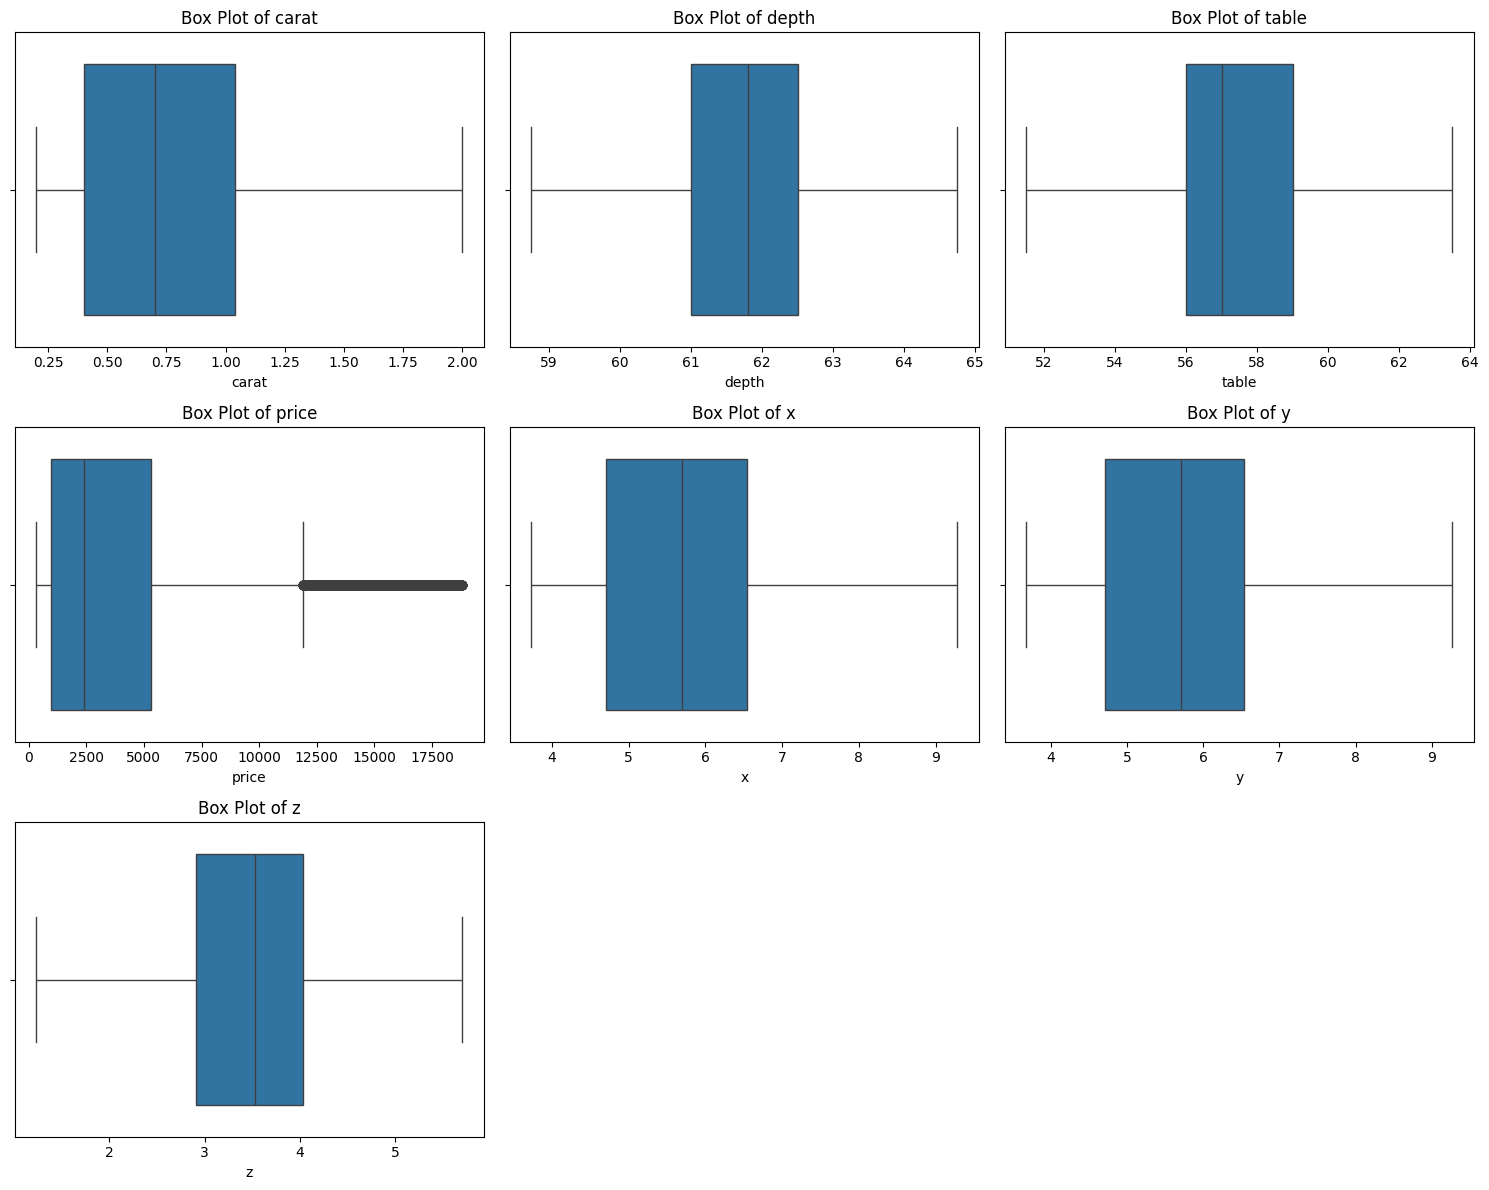

In [21]:
# Create a Box-Plot Diagram to visualize the outliers after handling outliers

# Select all numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Calculate rows and columns for subplots
num_vars = len(numeric_columns)
cols = 3  # number of boxplots per row
rows = int(np.ceil(num_vars / cols))

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

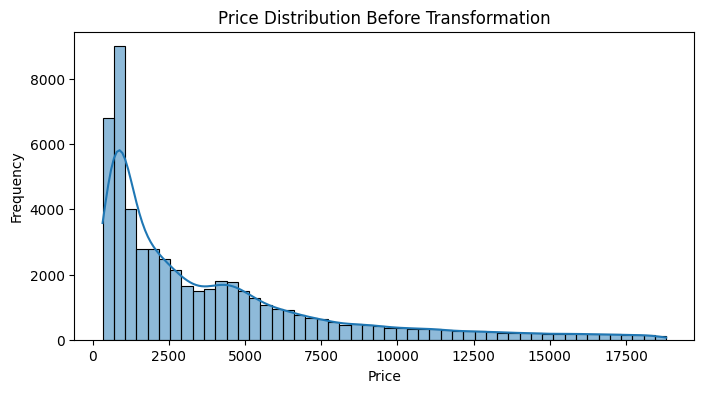

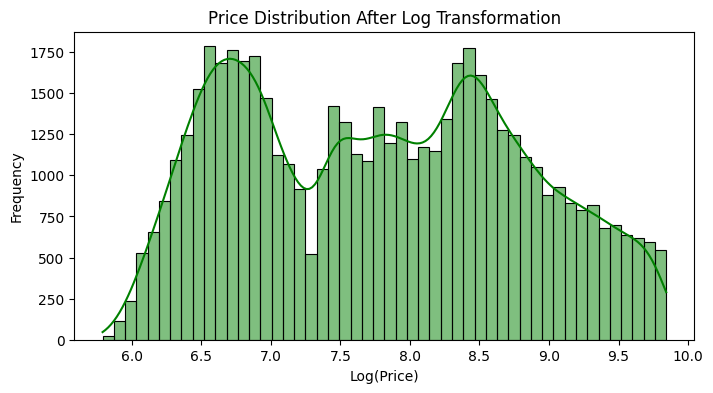

In [22]:
# Handle Imbalanced Data

# Check the distribution of the target variable before transformation
plt.figure(figsize=(8, 4))
sns.histplot(y, bins=50, kde=True)
plt.title('Price Distribution Before Transformation')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Apply log transformation to reduce skewness
y_log = np.log1p(y)

# Check the distribution of the target variable after transformation
plt.figure(figsize=(8, 4))
sns.histplot(y_log, bins=50, kde=True, color='green')
plt.title('Price Distribution After Log Transformation')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Train-test split with transformed target
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train models
lin_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
KNN_reg.fit(X_train, y_train)

# Predict (reverse the log transformation for metrics)
y_pred_lin = np.expm1(lin_reg.predict(X_test))
y_pred_tree = np.expm1(tree_reg.predict(X_test))
y_pred_KNN = np.expm1(KNN_reg.predict(X_test))

# Set up for R^2 Adjusted
n = X_test.shape[0]
p = X_test.shape[1]

metrics = {
    "Model": ["Linear Regression", "Decision Tree", "KNeighbors"],

    "RMSE": [
        np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_lin)),
        np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_tree)),
        np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_KNN))
        ],

    "R2 Score": [
        r2_score(np.expm1(y_test), y_pred_lin),
        r2_score(np.expm1(y_test), y_pred_tree),
        r2_score(np.expm1(y_test), y_pred_KNN)
        ],

    "Adjusted R2": [
        1 - (1 - r2_score(np.expm1(y_test), y_pred_lin)) * (n - 1) / (n - p - 1),
        1 - (1 - r2_score(np.expm1(y_test), y_pred_tree)) * (n - 1) / (n - p - 1),
        1 - (1 - r2_score(np.expm1(y_test), y_pred_KNN)) * (n - 1) / (n - p - 1)
        ],
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


               Model         RMSE  R2 Score  Adjusted R2
0  Linear Regression  1693.280936  0.819637     0.819537
1      Decision Tree  1854.837629  0.783578     0.783458
2         KNeighbors  1441.987580  0.869198     0.869126


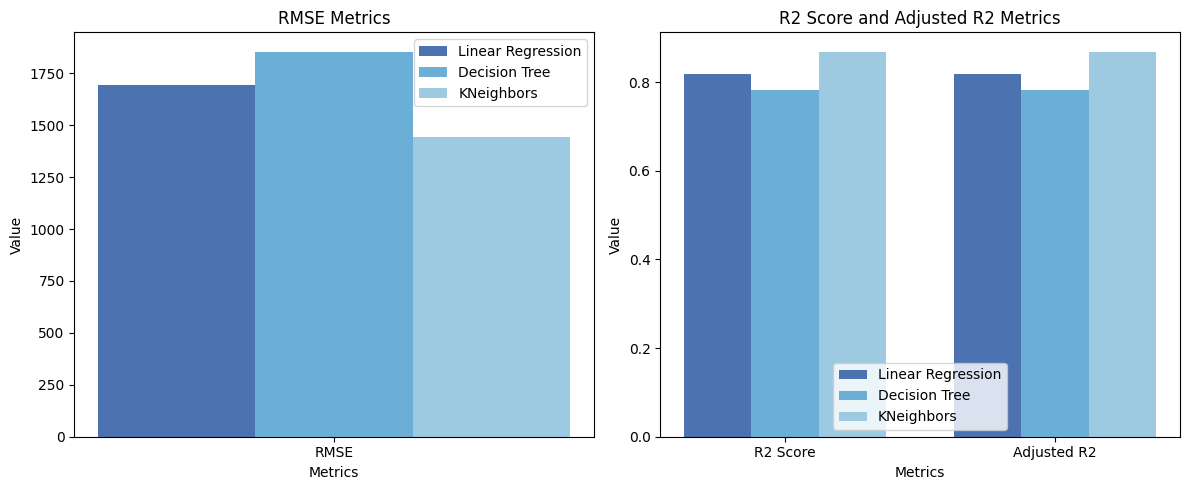

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define metric categories
metrics_rmse = ['RMSE']
metrics_r2 = ['R2 Score', 'Adjusted R2']

x_rmse = np.arange(len(metrics_rmse))
x_r2 = np.arange(len(metrics_r2))

# Width of the bars
bar_width = 0.25

colors = ['#4C72B0', '#6BAED6', '#9ECAE1']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# RMSE bar chart
ax[0].bar(x_rmse - bar_width, [metrics_df.iloc[0, 1]], bar_width, label='Linear Regression', color=colors[0])
ax[0].bar(x_rmse, [metrics_df.iloc[1, 1]], bar_width, label='Decision Tree', color=colors[1])
ax[0].bar(x_rmse + bar_width, [metrics_df.iloc[2, 1]], bar_width, label='KNeighbors', color=colors[2])

ax[0].set_xlabel('Metrics')
ax[0].set_ylabel('Value')
ax[0].set_title('RMSE Metrics')
ax[0].set_xticks(x_rmse)
ax[0].set_xticklabels(metrics_rmse)
ax[0].legend()

# R2 Score and Adjusted R2 bar chart
ax[1].bar(x_r2 - bar_width, metrics_df.iloc[0, [2, 3]].values, bar_width, label='Linear Regression', color=colors[0])
ax[1].bar(x_r2, metrics_df.iloc[1, [2, 3]].values, bar_width, label='Decision Tree', color=colors[1])
ax[1].bar(x_r2 + bar_width, metrics_df.iloc[2, [2, 3]].values, bar_width, label='KNeighbors', color=colors[2])

ax[1].set_xlabel('Metrics')
ax[1].set_ylabel('Value')
ax[1].set_title('R2 Score and Adjusted R2 Metrics')
ax[1].set_xticks(x_r2)
ax[1].set_xticklabels(metrics_r2)
ax[1].legend()

plt.tight_layout()
plt.show()

### **4. Feature Engineering and Preparation for Machine Learning**

In [25]:
# Create new features

# Volume feature: give a proxy for the physical size of the diamond

# Carat Per Volume: give a sense of density

# Depth Table Ration: affect how light reflects through the diamond

df['volume'] = df['x'] * df['y'] * df['z']
df['carat_per_volume'] = df['carat'] / df['volume']
df['depth_table_ratio'] = df['depth'] / df['table']

print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2  61.50   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1  59.80   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1  58.75   63.5    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2  62.40   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2  63.30   58.0    335  4.34  4.35  2.75   

      volume  carat_per_volume  depth_table_ratio  
0  38.202030          0.006021           1.118182  
1  34.505856          0.006086           0.980328  
2  38.076885          0.006040           0.925197  
3  46.724580          0.006207           1.075862  
4  51.917250          0.005971           1.091379  


In [26]:
# Standardize the variables
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# List of features to scale
features_to_scale = [
    'carat', 'depth', 'table', 'x', 'y', 'z',
    'volume', 'carat_per_volume', 'depth_table_ratio'
]

# Applying StandardScaler to the selected features
scaled_features = scaler.fit_transform(df[features_to_scale])

# Create a DataFrame from the scaled features - fixing the naming issue
scaled_columns = [f'scaled_{col}' for col in features_to_scale]
scaled_features_df = pd.DataFrame(scaled_features, columns=scaled_columns, index=df.index)

# Concatenate the scaled features with the original dataframe
df = pd.concat([df, scaled_features_df], axis=1)

# Display the first few rows
pd.set_option('display.max_columns', None)
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2  61.50   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1  59.80   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1  58.75   63.5    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2  62.40   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2  63.30   58.0    335  4.34  4.35  2.75   

      volume  carat_per_volume  depth_table_ratio  scaled_carat  scaled_depth  \
0  38.202030          0.006021           1.118182     -1.231528     -0.195554   
1  34.505856          0.006086           0.980328     -1.275334     -1.534808   
2  38.076885          0.006040           0.925197     -1.231528     -2.361994   
3  46.724580          0.006207           1.075862     -1.100108      0.513462   
4  51.917250          0.005971           1.091379     -1.056301      1.222479   

   scaled_table  scaled_x  scaled_y  scaled_z  scaled_volume  \
0   

In [27]:
# Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

label_encoder = LabelEncoder()

categorical_columns = ['cut', 'clarity', 'color']

for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df[column])

print(df_encoded.head())

   carat  cut  color  clarity  depth  table  price     x     y     z  \
0   0.23    2      1        3  61.50   55.0    326  3.95  3.98  2.43   
1   0.21    3      1        2  59.80   61.0    326  3.89  3.84  2.31   
2   0.23    1      1        4  58.75   63.5    327  4.05  4.07  2.31   
3   0.29    3      5        5  62.40   58.0    334  4.20  4.23  2.63   
4   0.31    1      6        3  63.30   58.0    335  4.34  4.35  2.75   

      volume  carat_per_volume  depth_table_ratio  scaled_carat  scaled_depth  \
0  38.202030          0.006021           1.118182     -1.231528     -0.195554   
1  34.505856          0.006086           0.980328     -1.275334     -1.534808   
2  38.076885          0.006040           0.925197     -1.231528     -2.361994   
3  46.724580          0.006207           1.075862     -1.100108      0.513462   
4  51.917250          0.005971           1.091379     -1.056301      1.222479   

   scaled_table  scaled_x  scaled_y  scaled_z  scaled_volume  \
0     -1.128950 

In [28]:
# Retrain models with hyperparameters tuning
from sklearn.model_selection import GridSearchCV

# Select engineered and scaled features
features_to_use = [
    'scaled_carat', 'scaled_depth', 'scaled_table', 'scaled_x', 'scaled_y', 'scaled_z',
    'scaled_volume', 'scaled_carat_per_volume', 'scaled_depth_table_ratio',
    'cut', 'clarity', 'color'  # will be label encoded below
]

# Prepare encoded dataframe
df_encoded = df.copy()
label_encoder = LabelEncoder()
for col in ['cut', 'clarity', 'color']:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Define X and y
X = df_encoded[features_to_use]
y = np.log1p(df_encoded['price'])  # log-transformed price

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids
tree_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

knn_params = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1=Manhattan, 2=Euclidean
}

# Initialize models
tree_reg = DecisionTreeRegressor(random_state=42)
knn_reg = KNeighborsRegressor()

# Grid search
tree_grid = GridSearchCV(tree_reg, tree_params, cv=3, n_jobs=-1, verbose=1)
knn_grid = GridSearchCV(knn_reg, knn_params, cv=3, n_jobs=-1, verbose=1)

tree_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)

# Best models
tree_best = tree_grid.best_estimator_
knn_best = knn_grid.best_estimator_

# Predict
y_pred_tree = np.expm1(tree_best.predict(X_test))
y_pred_knn = np.expm1(knn_best.predict(X_test))
y_true = np.expm1(y_test)

# Metrics
n = X_test.shape[0]
p = X_test.shape[1]

metrics = {
    "Model": ["Decision Tree", "KNeighbors"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_true, y_pred_tree)),
        np.sqrt(mean_squared_error(y_true, y_pred_knn))
    ],
    "R2 Score": [
        r2_score(y_true, y_pred_tree),
        r2_score(y_true, y_pred_knn)
    ],
    "Adjusted R2": [
        1 - (1 - r2_score(y_true, y_pred_tree)) * (n - 1) / (n - p - 1),
        1 - (1 - r2_score(y_true, y_pred_knn)) * (n - 1) / (n - p - 1)
    ]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
           Model        RMSE  R2 Score  Adjusted R2
0  Decision Tree  646.994795  0.973512     0.973482
1     KNeighbors  720.446034  0.967156     0.967119


In [29]:
# Print best hyperparameters
print("Best parameters for Decision Tree:")
print(tree_grid.best_params_)

print("\nBest parameters for KNN:")
print(knn_grid.best_params_)

Best parameters for Decision Tree:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Best parameters for KNN:
{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [35]:
# Get feature importances from the best decision tree
importances = tree_best.feature_importances_

# Match with the feature names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Decision Tree):")
print(feature_importance_df)


Feature Importances (Decision Tree):
                     Feature  Importance
4                   scaled_y    0.852245
6              scaled_volume    0.082282
10                   clarity    0.030599
11                     color    0.015912
3                   scaled_x    0.012126
0               scaled_carat    0.003448
7    scaled_carat_per_volume    0.000781
8   scaled_depth_table_ratio    0.000698
5                   scaled_z    0.000653
9                        cut    0.000558
1               scaled_depth    0.000443
2               scaled_table    0.000254


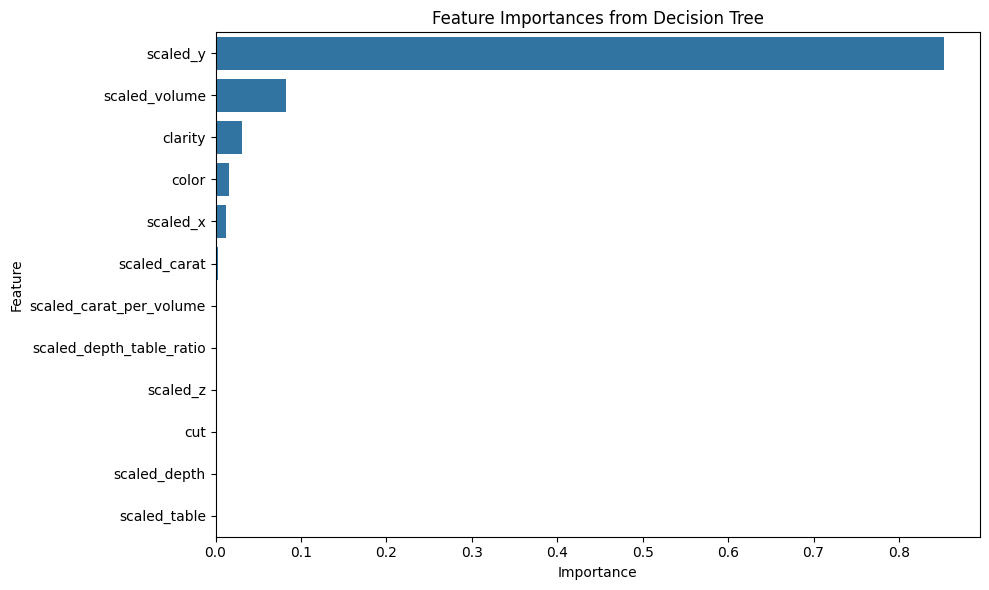

In [37]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Decision Tree')
plt.tight_layout()
plt.show()

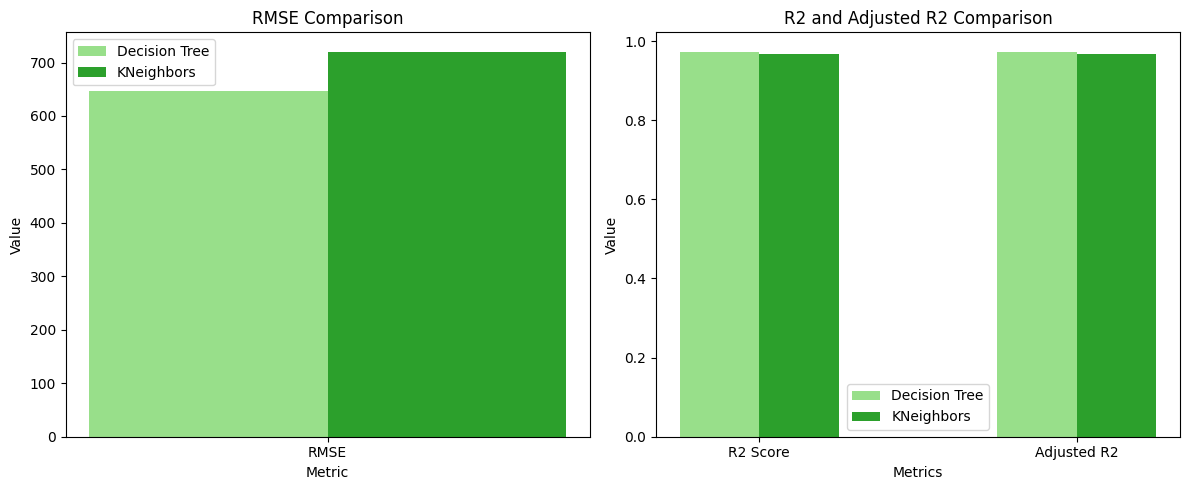

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define metric categories
metrics_rmse = ['RMSE']
metrics_r2 = ['R2 Score', 'Adjusted R2']

x_rmse = np.arange(len(metrics_rmse))
x_r2 = np.arange(len(metrics_r2))

# Width of bars
bar_width = 0.25

colors = ['#98DF8A', '#2CA02C']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# RMSE bar chart
ax[0].bar(x_rmse - bar_width/2, [metrics_df.iloc[0, 1]], bar_width, label='Decision Tree', color=colors[0])
ax[0].bar(x_rmse + bar_width/2, [metrics_df.iloc[1, 1]], bar_width, label='KNeighbors', color=colors[1])

ax[0].set_xlabel('Metric')
ax[0].set_ylabel('Value')
ax[0].set_title('RMSE Comparison')
ax[0].set_xticks(x_rmse)
ax[0].set_xticklabels(metrics_rmse)
ax[0].legend()

# R2 Score and Adjusted R2 bar chart
r2_scores_tree = metrics_df.iloc[0, [2, 3]].values
r2_scores_knn = metrics_df.iloc[1, [2, 3]].values

ax[1].bar(x_r2 - bar_width/2, r2_scores_tree, bar_width, label='Decision Tree', color=colors[0])
ax[1].bar(x_r2 + bar_width/2, r2_scores_knn, bar_width, label='KNeighbors', color=colors[1])

ax[1].set_xlabel('Metrics')
ax[1].set_ylabel('Value')
ax[1].set_title('R2 and Adjusted R2 Comparison')
ax[1].set_xticks(x_r2)
ax[1].set_xticklabels(metrics_r2)
ax[1].legend()

plt.tight_layout()
plt.show()


### **5: Advanced Regression Model**

In [33]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Copy and encode the categorical columns
df_encoded = df.copy()
label_encoder = LabelEncoder()
for col in ['cut', 'clarity', 'color']:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Use engineered and scaled features + encoded categoricals
features_to_use = [
    'scaled_carat', 'scaled_depth', 'scaled_table', 'scaled_x', 'scaled_y', 'scaled_z',
    'scaled_volume', 'scaled_carat_per_volume', 'scaled_depth_table_ratio',
    'cut', 'clarity', 'color'
]

X = df_encoded[features_to_use]
y = df_encoded['price']

# Hyperparameter grids
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_regressor = RandomForestRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42)

# Randomized search
rf_random = RandomizedSearchCV(rf_regressor, rf_params, n_iter=8, cv=3, verbose=1, n_jobs=-1, random_state=42)
xgb_random = RandomizedSearchCV(xgb_regressor, xgb_params, n_iter=8, cv=3, verbose=1, n_jobs=-1, random_state=42)

# Fit models
rf_random.fit(X_train, y_train)
xgb_random.fit(X_train, y_train)

# Predictions
rf_best = rf_random.best_estimator_
xgb_best = xgb_random.best_estimator_

y_pred_rf = rf_best.predict(X_test)
y_pred_xgb = xgb_best.predict(X_test)

# Evaluation
n = X_test.shape[0]
p = X_test.shape[1]

metrics = {
    "Model": ["Random Forest", "XGBoost"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ],
    "Adjusted R2": [
        1 - (1 - r2_score(y_test, y_pred_rf)) * (n - 1) / (n - p - 1),
        1 - (1 - r2_score(y_test, y_pred_xgb)) * (n - 1) / (n - p - 1)
    ]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
           Model        RMSE  R2 Score  Adjusted R2
0  Random Forest  626.492564  0.975164     0.975136
1        XGBoost  532.099527  0.982084     0.982064


In [40]:
# Print best hyperparameters
print("Best parameters for Random Forest:")
print(rf_random.best_params_)

print("\nBest parameters for XGBoost:")
print(xgb_random.best_params_)

Best parameters for Random Forest:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}

Best parameters for XGBoost:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


In [43]:
# Feature importance from best XGBoost model
importances_xgb = xgb_best.feature_importances_

# Create a DataFrame
xgb_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False)

print("XGBoost Feature Importances:")
print(xgb_importance_df)

XGBoost Feature Importances:
                     Feature  Importance
6              scaled_volume    0.537214
4                   scaled_y    0.189126
0               scaled_carat    0.188068
10                   clarity    0.037232
11                     color    0.023449
3                   scaled_x    0.008831
5                   scaled_z    0.006199
9                        cut    0.004167
7    scaled_carat_per_volume    0.001534
8   scaled_depth_table_ratio    0.001518
1               scaled_depth    0.001469
2               scaled_table    0.001193


In [42]:
# Feature importance from best Random Forest model
importances_rf = rf_best.feature_importances_

# Create a DataFrame
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
print(rf_importance_df)

Random Forest Feature Importances:
                     Feature  Importance
6              scaled_volume    0.232318
0               scaled_carat    0.212414
4                   scaled_y    0.204351
3                   scaled_x    0.134875
5                   scaled_z    0.105515
10                   clarity    0.048940
11                     color    0.027959
7    scaled_carat_per_volume    0.017366
8   scaled_depth_table_ratio    0.004963
1               scaled_depth    0.004671
2               scaled_table    0.003703
9                        cut    0.002926


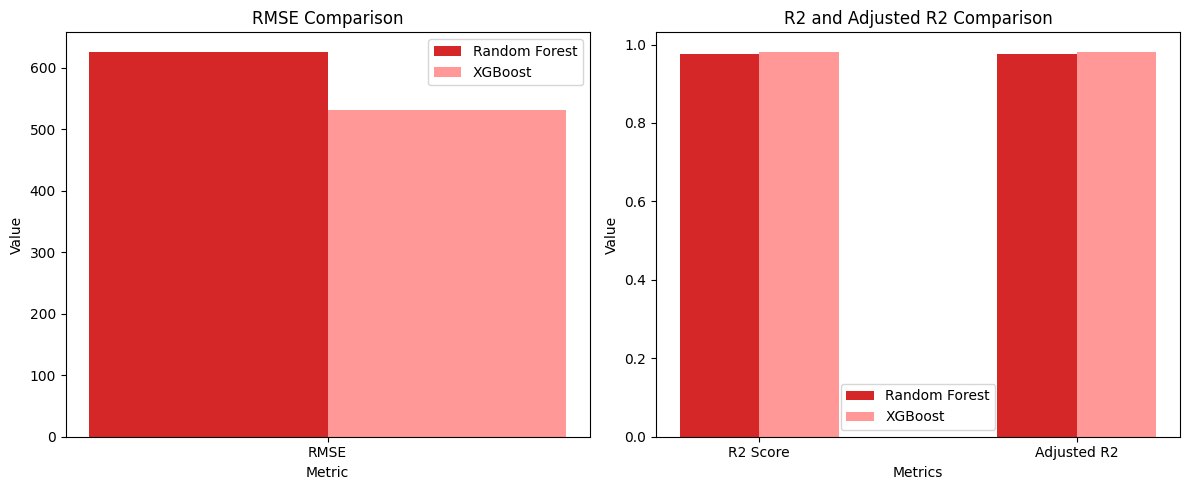

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define metric categories
metrics_rmse = ['RMSE']
metrics_r2 = ['R2 Score', 'Adjusted R2']

x_rmse = np.arange(len(metrics_rmse))
x_r2 = np.arange(len(metrics_r2))

# Width of bars
bar_width = 0.25

colors = ['#D62728', '#FF9896']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# RMSE bar chart
ax[0].bar(x_rmse - bar_width/2, [metrics_df.iloc[0, 1]], bar_width, label='Random Forest', color=colors[0])
ax[0].bar(x_rmse + bar_width/2, [metrics_df.iloc[1, 1]], bar_width, label='XGBoost', color=colors[1])

ax[0].set_xlabel('Metric')
ax[0].set_ylabel('Value')
ax[0].set_title('RMSE Comparison')
ax[0].set_xticks(x_rmse)
ax[0].set_xticklabels(metrics_rmse)
ax[0].legend()

# R2 Score and Adjusted R2 bar chart
r2_scores_tree = metrics_df.iloc[0, [2, 3]].values
r2_scores_knn = metrics_df.iloc[1, [2, 3]].values

ax[1].bar(x_r2 - bar_width/2, r2_scores_tree, bar_width, label='Random Forest', color=colors[0])
ax[1].bar(x_r2 + bar_width/2, r2_scores_knn, bar_width, label='XGBoost', color=colors[1])

ax[1].set_xlabel('Metrics')
ax[1].set_ylabel('Value')
ax[1].set_title('R2 and Adjusted R2 Comparison')
ax[1].set_xticks(x_r2)
ax[1].set_xticklabels(metrics_r2)
ax[1].legend()

plt.tight_layout()
plt.show()